In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [3]:
df1 = pd.read_csv("train.csv")
df2 = pd.read_csv("test.csv")
df3 = pd.read_csv("gender_submission.csv")


# Loading the data and performing basic data analysis

In [4]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df1.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [6]:
df1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

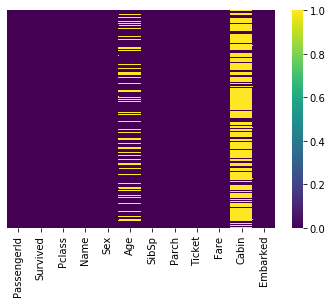

In [7]:
sns.heatmap(df1.isnull(), yticklabels=False, cmap='viridis')

In [8]:
df1.dropna(inplace=True)

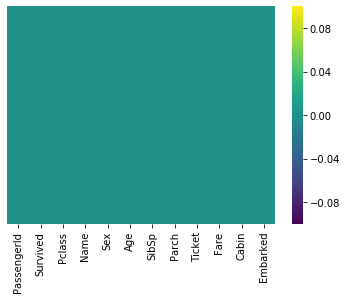

In [9]:
sns.heatmap(df1.isnull(),yticklabels=False, cmap='viridis')

**The data is clean now**

In [10]:
df1.shape

(183, 12)

# Data Visualization and analysis

In [11]:
import seaborn as sns

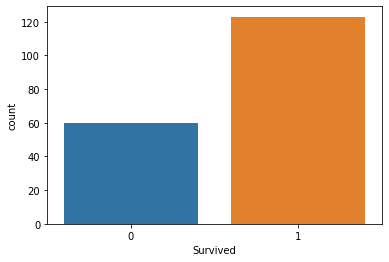

In [12]:
sns.countplot(x='Survived', data=df1)

**Hence the survivals are less than non-survivals**

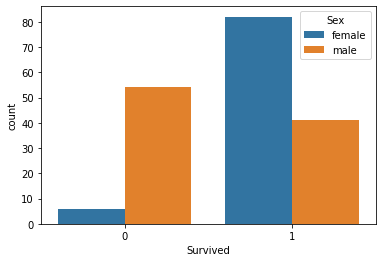

In [13]:
sns.countplot(x='Survived', hue='Sex', data=df1)

1. In the non-survivals column, majority are men, i.e, majority of the men didn't survive
2. In the survivals column, majority are women, i.e, majority of the women survived.

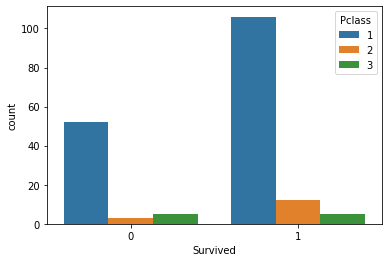

In [14]:
sns.countplot(x='Survived', hue='Pclass', data=df1)

**Passengers travelling in the 3rd class were most likely to not survive **

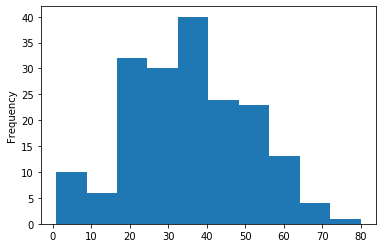

In [15]:
df1['Age'].plot.hist()

**People of the middle age group(20-40) were more in number in titanic**

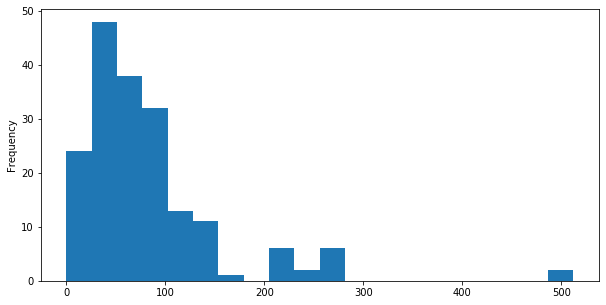

In [16]:
df1['Fare'].plot.hist(bins=20, figsize=(10,5))

**Most of the fare collected from the passengers were between 1-100. Only a few were between 100-200 & further less were between 200-300**

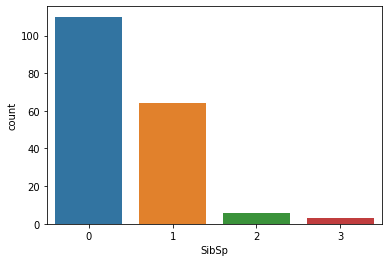

In [17]:
sns.countplot(x='SibSp', data=df1)

**Most of the people on titanic neither had a spouse nor a sibling.**

In [18]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [19]:
df1.drop('Cabin', inplace=True, axis=1)
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,S


In [20]:
sex=pd.get_dummies(df1["Sex"],drop_first=True)
sex.head()

,male
1,0
3,0
6,1
10,0
11,0


**We dont need 2 columns as obviously is the passenger is not female it will be male. Thus we used drop_first=True.**

In [21]:
embark=pd.get_dummies(df1["Embarked"],drop_first=True)
embark.head()

,Q,S
1,0,0
3,0,1
6,0,1
10,0,1
11,0,1


**Same is the case here as the if the passenger is not travelling from either Q or S,it wll definitely be from C.**

In [22]:
pclass=pd.get_dummies(df1["Pclass"],drop_first=True)
pclass.head()

,2,3
1,0,0
3,0,0
6,0,0
10,0,1
11,0,0


**Same is the case here as the if the passenger is not travelling in either class 2 or class 3,he/she wll definitely be in class 1.**

In [23]:
df1 = pd.concat([df1,sex,embark,pclass], axis=1)
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,1,0,1,0,0
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,S,0,0,1,0,1
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,S,0,0,1,0,0


In [24]:
df1.drop(['Sex','Embarked','PassengerId','Name','Ticket','Pclass'],axis=1, inplace=True)
df1.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
1,1,38.0,1,0,71.2833,0,0,0,0,0
3,1,35.0,1,0,53.1000,0,0,1,0,0
6,0,54.0,0,0,51.8625,1,0,1,0,0
10,1,4.0,1,1,16.7000,0,0,1,0,1
11,1,58.0,0,0,26.5500,0,0,1,0,0


# Training Data

In [25]:
import sklearn

x = df1.drop(['Survived'], axis=1)
y = df1['Survived']

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
logmodel = LogisticRegression()
logmodel.fit(x , y)

C:\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [29]:
df2.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [30]:
df2.dropna(inplace=True)

In [31]:
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
12,904,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S
14,906,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,61.1750,E31,S
24,916,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C
26,918,1,"Ostby, Miss. Helene Ragnhild",female,22.0,0,1,113509,61.9792,B36,C
28,920,1,"Brady, Mr. John Bertram",male,41.0,0,0,113054,30.5000,A21,S


In [32]:
df2.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [33]:
sex = pd.get_dummies(df2['Sex'], drop_first=True)
sex.head()

,male
12,0
14,0
24,0
26,0
28,1


In [34]:
embark = pd.get_dummies(df2['Embarked'], drop_first=True)
embark.head()

,Q,S
12,0,1
14,0,1
24,0,0
26,0,0
28,0,1


In [35]:
pclass = pd.get_dummies(df2['Pclass'], drop_first=True)
pclass.head()

,2,3
12,0,0
14,0,0
24,0,0
26,0,0
28,0,0


In [36]:
df2 = pd.concat([df2, sex, embark, pclass], axis=1)
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Q,S,2,3
12,904,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S,0,0,1,0,0
14,906,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,61.1750,E31,S,0,0,1,0,0
24,916,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C,0,0,0,0,0
26,918,1,"Ostby, Miss. Helene Ragnhild",female,22.0,0,1,113509,61.9792,B36,C,0,0,0,0,0
28,920,1,"Brady, Mr. John Bertram",male,41.0,0,0,113054,30.5000,A21,S,1,0,1,0,0


In [37]:
df2.drop(['Cabin','Sex','Embarked','PassengerId','Name','Ticket','Pclass'], axis=1, inplace=True)
df2.head()

,Age,SibSp,Parch,Fare,male,Q,S,2,3
12,23.0,1,0,82.2667,0,0,1,0,0
14,47.0,1,0,61.1750,0,0,1,0,0
24,48.0,1,3,262.3750,0,0,0,0,0
26,22.0,0,1,61.9792,0,0,0,0,0
28,41.0,0,0,30.5000,1,0,1,0,0


In [38]:
pred=logmodel.predict(df2)

In [39]:
pred[0:5]

array([1, 1, 1, 1, 0], dtype=int64)

In [40]:
df2.shape

(87, 9)

In [41]:
print("Age",'SibSp','Parch','Fare','male','Q','S','2','3',"Survived")
for i in range(0,87):
    print(df2["Age"].values[i],df2["SibSp"].values[i],df2["Parch"].values[i],df2["Fare"].values[i],df2["male"].values[i],df2["Q"].values[i],df2["S"].values[i],pred[i])

Age SibSp Parch Fare male Q S 2 3 Survived
23.0 1 0 82.2667 0 0 1 1
47.0 1 0 61.175 0 0 1 1
48.0 1 3 262.375 0 0 0 1
22.0 0 1 61.9792 0 0 0 1
41.0 0 0 30.5 1 0 1 0
30.0 1 0 57.75 1 0 0 1
45.0 1 0 52.5542 0 0 1 1
45.0 0 0 29.7 1 0 0 0
60.0 0 0 76.2917 0 0 0 1
24.0 1 0 60.0 1 0 1 1
28.0 3 2 263.0 0 0 1 1
25.0 0 0 7.65 1 0 1 0
36.0 0 0 262.375 0 0 0 1
13.0 2 2 262.375 1 0 0 1
31.0 0 0 28.5375 1 0 0 0
60.0 1 4 263.0 0 0 1 1
28.5 0 0 27.7208 1 0 0 0
35.0 0 0 211.5 0 0 0 1
32.5 0 0 211.5 1 0 0 1
55.0 2 0 25.7 0 0 1 1
67.0 1 0 221.7792 1 0 1 1
27.0 1 2 52.0 0 0 1 1
76.0 1 0 78.85 0 0 1 1
43.0 1 0 55.4417 0 0 0 1
18.5 0 0 13.0 1 0 1 1
36.0 0 0 31.6792 0 0 0 1
63.0 1 0 221.7792 0 0 1 1
1.0 1 1 16.7 0 0 1 1
36.0 0 0 75.2417 1 0 0 0
35.0 1 0 57.75 0 0 0 1
53.0 0 0 28.5 1 0 0 0
61.0 1 3 262.375 1 0 0 0
23.0 0 1 83.1583 0 0 0 1
29.0 0 0 221.7792 0 0 1 1
42.0 0 0 26.55 1 0 1 0
48.0 0 0 50.4958 1 0 0 0
54.0 1 0 55.4417 1 0 0 0
36.0 0 3 39.0 0 0 1 1
64.0 0 2 83.1583 0 0 0 1
37.0 1 1 83.1583 1 0 0 0
18